# Deep Learning

### Musel Tabares
### A00830710

Importamos librerias

In [34]:
#para utilizar tensores etc
import torch
#para el modelo
from torch import nn
#para importar datasets
import torchvision
#para transformar imagenes
import torchvision.transforms as transforms
#para visualizaciones
import matplotlib.pyplot as plt
#ver a detalle el modelo
from torchsummary import summary
# barra de progreso
from tqdm.auto import tqdm

#importamos funciones
from utils import *

## FashionMNIST

Importamos datos

In [35]:
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,download=True, transform=transforms.ToTensor())
testset = torchvision.datasets.FashionMNIST(root='./data', train=False,download=True, transform=transforms.ToTensor())
classes = trainset.classes

Observamos la dimension de las imagenes

In [36]:
# desplegamos primer imagen
image, label = trainset[0]
image.shape, label

(torch.Size([1, 28, 28]), 9)

Observamos cantidad de datos en train y test

In [37]:
len(trainset.data), len(trainset.targets), len(testset.data), len(testset.targets)

(60000, 60000, 10000, 10000)

Creamos batches de los datos

In [38]:
batch_size = 32
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,shuffle=False, num_workers=2)

Observamos cuantos batches se crearon

In [39]:
print(f"Length of train dataloader: {len(trainloader)} batches of {batch_size}")
print(f"Length of test dataloader: {len(testloader)} batches of {batch_size}")

Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


visualizamos 16 imagenes de manera aleatoria

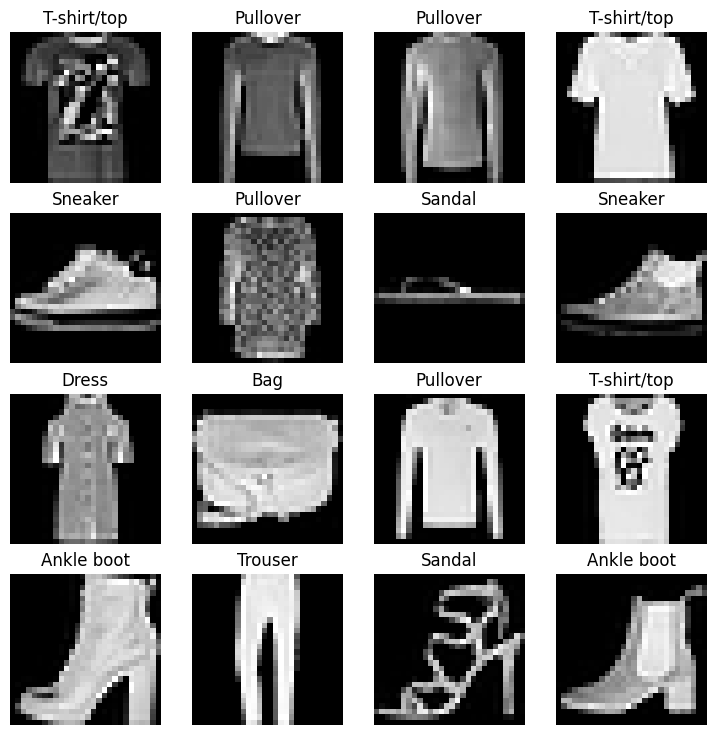

In [40]:
plot_sample_images(trainset, classes, 4, 4)

Creamos modelo

In [41]:
class conv(nn.Module):

    def __init__(self):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(1,32, kernel_size=(3,3), stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2)),
            nn.Conv2d(32,64, kernel_size=(3,3), stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2)),
            nn.Conv2d(64,256, kernel_size=(3,3), stride=1),
            nn.ReLU(),

        )
        self.block_2 = nn.Sequential(
            nn.Flatten(),
            nn.Linear(2304, 64), 
            nn.ReLU(),
            nn.Linear(64, 10),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        x = self.block_1(x)
        x = self.block_2(x)
        return x

instanciamos el modelo

In [42]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model_0 = conv().to(device) 
summary(model_0, (1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
              ReLU-2           [-1, 32, 26, 26]               0
         MaxPool2d-3           [-1, 32, 13, 13]               0
            Conv2d-4           [-1, 64, 11, 11]          18,496
              ReLU-5           [-1, 64, 11, 11]               0
         MaxPool2d-6             [-1, 64, 5, 5]               0
            Conv2d-7            [-1, 256, 3, 3]         147,712
              ReLU-8            [-1, 256, 3, 3]               0
           Flatten-9                 [-1, 2304]               0
           Linear-10                   [-1, 64]         147,520
             ReLU-11                   [-1, 64]               0
           Linear-12                   [-1, 10]             650
          Sigmoid-13                   [-1, 10]               0
Total params: 314,698
Trainable params:

definimos funcion de perdida y optimizador

In [43]:
loss_fn = nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(params=model_0.parameters())

corremos modelo

In [44]:

NUM_EPOCHS = 10
model_0_results = train(model=model_0, 
                        train_dataloader=trainloader,
                        test_dataloader=testloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS,
                        device=device)


 10%|█         | 1/10 [00:12<01:53, 12.66s/it]

Epoch: 1 | train_loss: 1.6492 | train_acc: 0.6457 | test_loss: 1.5980 | test_acc: 0.7162


 20%|██        | 2/10 [00:26<01:45, 13.16s/it]

Epoch: 2 | train_loss: 1.5816 | train_acc: 0.7800 | test_loss: 1.5752 | test_acc: 0.8150


 30%|███       | 3/10 [00:38<01:28, 12.68s/it]

Epoch: 3 | train_loss: 1.5653 | train_acc: 0.8266 | test_loss: 1.5680 | test_acc: 0.8273


 40%|████      | 4/10 [00:51<01:18, 13.09s/it]

Epoch: 4 | train_loss: 1.5469 | train_acc: 0.8641 | test_loss: 1.5437 | test_acc: 0.8641


 50%|█████     | 5/10 [01:03<01:02, 12.58s/it]

Epoch: 5 | train_loss: 1.5388 | train_acc: 0.8748 | test_loss: 1.5412 | test_acc: 0.8785


 60%|██████    | 6/10 [01:18<00:53, 13.46s/it]

Epoch: 6 | train_loss: 1.5338 | train_acc: 0.8829 | test_loss: 1.5393 | test_acc: 0.8798


 70%|███████   | 7/10 [01:32<00:40, 13.65s/it]

Epoch: 7 | train_loss: 1.5305 | train_acc: 0.8866 | test_loss: 1.5431 | test_acc: 0.8731


 80%|████████  | 8/10 [01:45<00:26, 13.35s/it]

Epoch: 8 | train_loss: 1.5268 | train_acc: 0.8924 | test_loss: 1.5396 | test_acc: 0.8806


 90%|█████████ | 9/10 [01:57<00:13, 13.02s/it]

Epoch: 9 | train_loss: 1.5247 | train_acc: 0.8947 | test_loss: 1.5348 | test_acc: 0.8881


100%|██████████| 10/10 [02:10<00:00, 13.04s/it]

Epoch: 10 | train_loss: 1.5221 | train_acc: 0.8994 | test_loss: 1.5353 | test_acc: 0.8895


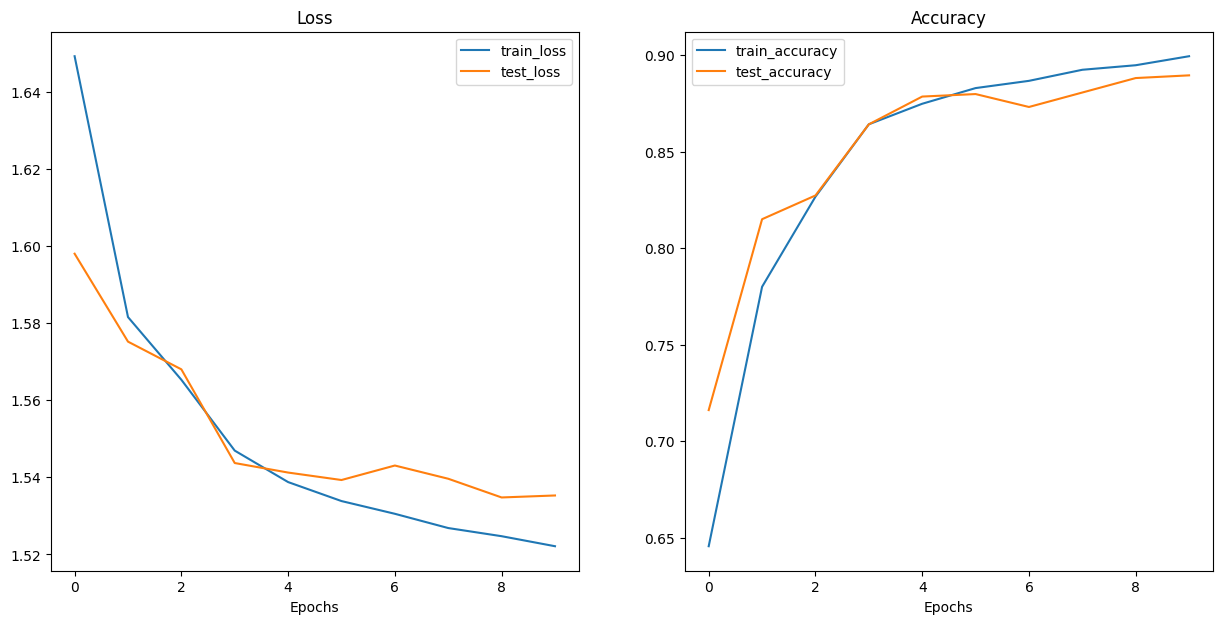

In [45]:
plot_loss_curves(model_0_results)

obtenemos una muestra de los datos del test set

In [46]:
import random

test_samples = []
test_labels = []

for sample, label in random.sample(list(testset), k=9):
    test_samples.append(sample)
    test_labels.append(label)


hacemos predicciones con la muestra que tomamos

In [47]:
pred_classes= make_predictions(model=model_0, data=test_samples, device=device)

In [48]:
classes[pred_classes[0]]

'Sneaker'

visualizamos las predicciones

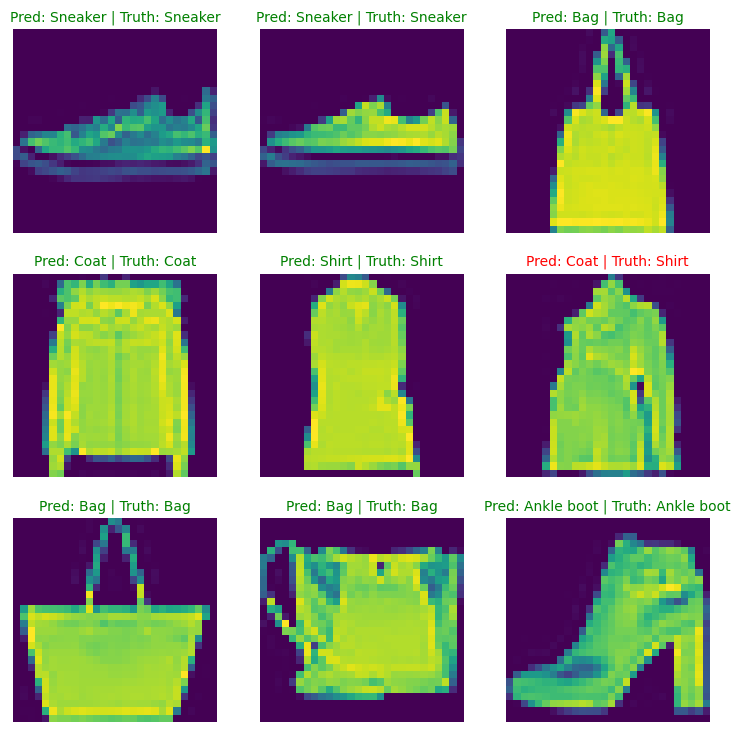

In [49]:
plot_predictions(test_samples, test_labels, classes, pred_classes)